In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'C:\Users\Zenbook\Downloads\rainfall in india 1901-2015.csv')

In [5]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [6]:
df.fillna(value = 0,inplace =True)
df.loc[21]

SUBDIVISION    ANDAMAN & NICOBAR ISLANDS
YEAR                                1923
JAN                                 79.5
FEB                                  0.0
MAR                                  0.0
APR                                 91.3
MAY                                293.5
JUN                                808.4
JUL                                636.9
AUG                                182.2
SEP                                560.5
OCT                                131.9
NOV                                197.4
DEC                                 70.6
ANNUAL                               0.0
Jan-Feb                             79.5
Mar-May                              0.0
Jun-Sep                           2188.0
Oct-Dec                            399.9
Name: 21, dtype: object

In [7]:
grouped = df.groupby(df.SUBDIVISION)
TN = grouped.get_group("TAMIL NADU")
TN.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3427,TAMIL NADU,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4,960.3,63.6,131.6,350.1,415.0
3428,TAMIL NADU,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8,1138.2,77.0,131.7,306.7,622.9
3429,TAMIL NADU,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2,1163.9,27.1,148.4,456.5,531.9
3430,TAMIL NADU,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1,663.1,35.3,142.1,249.9,235.8
3431,TAMIL NADU,1905,6.5,7.5,17.2,64.8,83.7,49.8,39.0,101.8,73.5,250.4,123.7,3.2,821.1,14.0,165.7,264.1,377.2


array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'JAN'}>, <Axes: title={'center': 'FEB'}>,
        <Axes: title={'center': 'MAR'}>],
       [<Axes: title={'center': 'APR'}>, <Axes: title={'center': 'MAY'}>,
        <Axes: title={'center': 'JUN'}>, <Axes: title={'center': 'JUL'}>],
       [<Axes: title={'center': 'AUG'}>, <Axes: title={'center': 'SEP'}>,
        <Axes: title={'center': 'OCT'}>, <Axes: title={'center': 'NOV'}>],
       [<Axes: title={'center': 'DEC'}>,
        <Axes: title={'center': 'ANNUAL'}>,
        <Axes: title={'center': 'Jan-Feb'}>,
        <Axes: title={'center': 'Mar-May'}>],
       [<Axes: title={'center': 'Jun-Sep'}>,
        <Axes: title={'center': 'Oct-Dec'}>, <Axes: >, <Axes: >]],
      dtype=object)

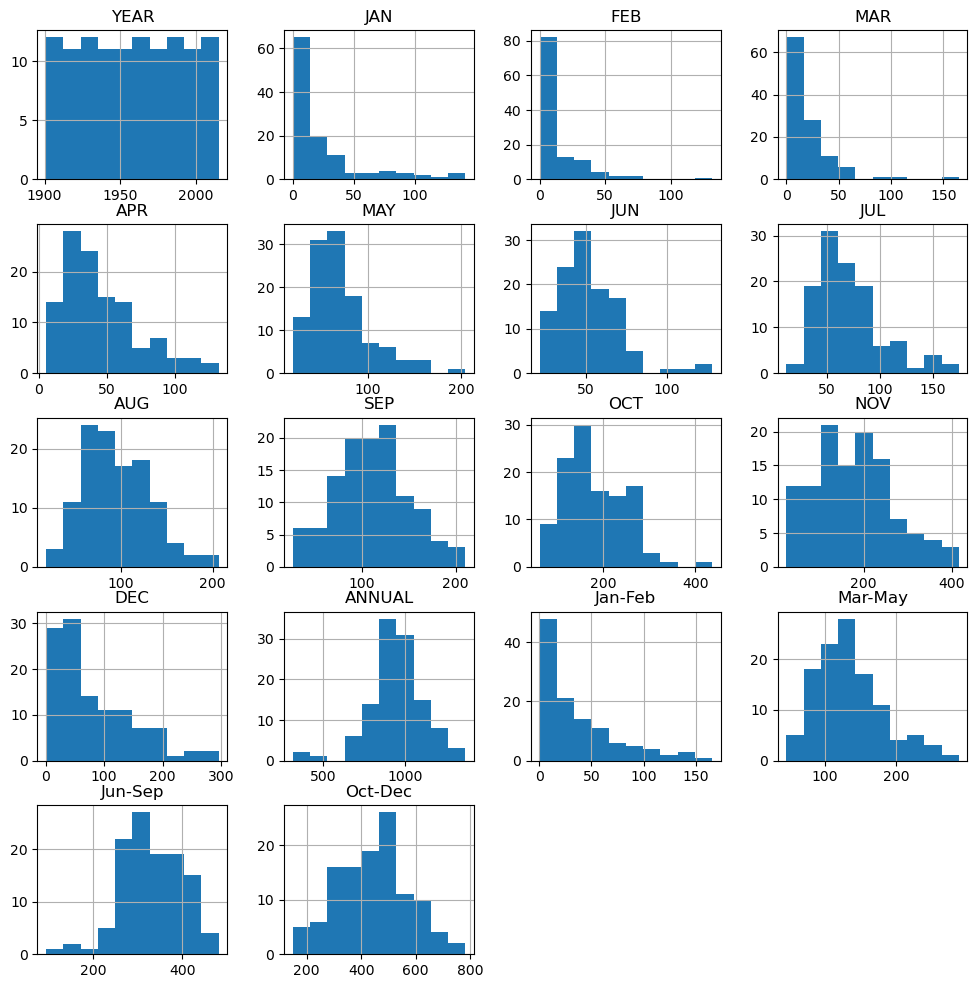

In [8]:
TN.hist(figsize=(12,12))

In [9]:
data = np.asarray(TN[['FEB', 'MAR', 'APR','MAY']])
print(np.shape(data))
X = data[:,0:3]
y = data[:,3]

(115, 4)


In [11]:
X = None; y = None
for i in range(data.shape[1]-3):
    if X is None:
        X = data[:, i:i+3]
        y = data[:, i+3]
    else:
        X = np.concatenate((X, data[:, i:i+3]), axis=0)
        y = np.concatenate((y, data[:, i+3]), axis=0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
np.shape(X_test)

(23, 3)

In [14]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_absolute_error(y_test, y_pred)

19.70989400599401

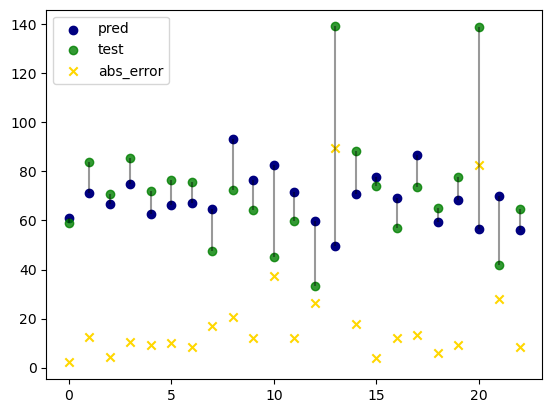

In [15]:
xx = np.arange(start=0,stop=len(y_pred),step=1)
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx,y_pred,color='navy', alpha=1, label='pred')
plt.scatter( xx,y_test, color='green', alpha=0.8 , label='test')
plt.scatter(xx,np.abs(y_pred-y_test),color='gold',label='abs_error',marker='x')
plt.legend()


In [16]:
linear_regressor = LinearRegression()  
linear_regressor.fit(X_train, y_train)  
Y_pred = linear_regressor.predict(X_test)  
mean_absolute_error(y_test, Y_pred)

17.043031008980464

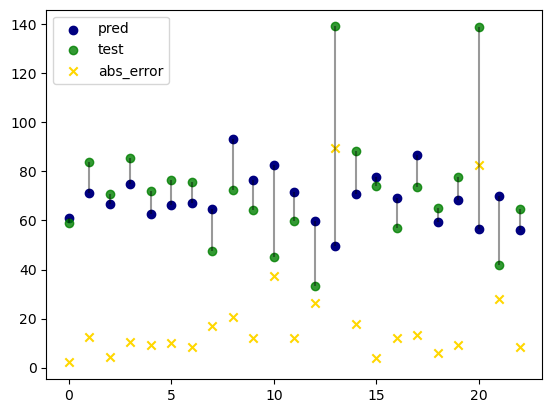

In [17]:
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx,y_pred,color='navy', alpha=1, label='pred')
plt.scatter( xx,y_test, color='green', alpha=0.8 , label='test')
plt.scatter(xx,np.abs(y_pred-y_test),color='gold',label='abs_error',marker='x')
plt.legend()

In [19]:
lrf = Lasso(alpha = 1.0, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None)
lrf.fit(X_train, y_train)
y_pred = lrf.predict(X_test)
mean_absolute_error(y_test, y_pred)

17.03507617079941

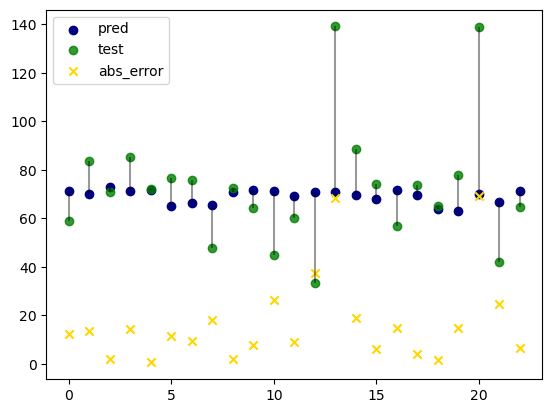

In [20]:
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx,y_pred,color='navy', alpha=1, label='pred')
plt.scatter( xx,y_test, color='green', alpha=0.8 , label='test')
plt.scatter(xx,np.abs(y_pred-y_test),color='gold',label='abs_error',marker='x')
plt.legend()

In [21]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X, y)
y_pred = rf.predict(X)
mean_absolute_error(y, y_pred)

10.67441758151956

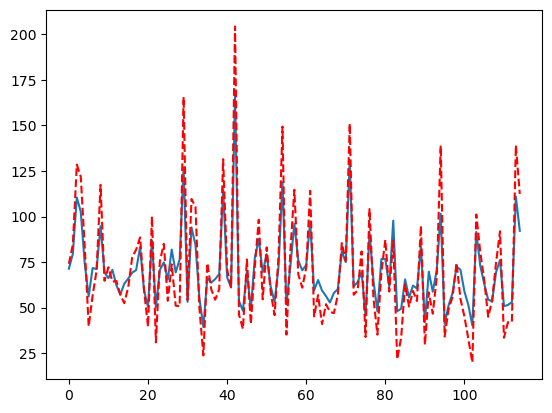

In [22]:
x_tot =np.arange(start=0,stop=len(y_pred),step=1)
plt.plot(x_tot,y_pred)
plt.plot(x_tot,y, "r--")